## TASK-A

### 1. estimating parzen window density

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
data1 = pd.read_csv("Parzen_Window_1_data.csv")
data1.head()

,Class1,Class2
0,6.331587,8.117476
1,5.715279,6.092543
2,3.454600,7.077091
3,4.991616,8.469751
4,5.621336,7.855633


In [49]:
seq = pd.concat([data1['Class1'], data1['Class2']],ignore_index=True)
df = pd.DataFrame(seq)

In [58]:
def gaussian_func(x,data):
    mean = np.mean(data,axis=0)
    power = (-1/2)*((x - mean))@(np.transpose(x-mean))
    const = ((2*np.pi)**(data.shape[1]/2))
    return (1/const)*np.exp(power)

In [59]:
def parzen_density_gaussian(x,data,h):
    density = 0
    for n in range(0,data.shape[0]):
        density += (1/(n+1)*h)*gaussian_func(((x-data.iloc[n])/h) ,data)

    return density

In [ ]:
parzen = np.zeros((64,))
index = 0
mini = df.min(axis=0)
maxi = df.max(axis=0)
h_list = [0.1,0.5,1,2,4]

fig,ax = plt.subplots(nrows = 1 , ncols = 1, figsize = (10,10))
for h in h_list:
    for x1 in np.linspace(mini, maxi, 1000):
        parzen[index] = parzen_density_gaussian(x1,df,h)

    ax.plot(np.linspace(mini, maxi, 1000),parzen)
    
    index += 1

In [9]:
data2 = pd.read_csv("Parzen_Window_2_data.csv")
data2.head()

,X,Y
0,3.489173,4.204452
1,6.342548,6.334164
2,4.821950,4.101864
3,4.715786,4.824334
4,5.083584,4.908983


## TASK-B

### DTW

In [19]:
x = pd.read_csv("DTW_ts1_data.csv")
y = pd.read_csv("DTW_ts2_data.csv")

In [20]:
x = x.values
y = y.values

In [21]:
def euclid_dist(a,b):
    dist = np.sum((a - b)**2)
    return (dist)**(1/2)

In [29]:
s = np.full((x.shape[0]+1, y.shape[0]+1), np.inf)
b = np.zeros((x.shape[0]+1,y.shape[0]+1))

# 0 - (i-1,j), 1 - (i-1,j-1), 2 - (i,j-1) 

s[0][0] = 0
for i in range(1,x.shape[0]+1):
    for j in range(1,y.shape[0]+1):
        mini = min(s[i-1][j],s[i-1][j-1],s[i][j-1])
        min_ind = np.argmin([s[i-1][j],s[i-1][j-1],s[i][j-1]])

        s[i][j] = euclid_dist(x[i-1],y[j-1]) + mini
        b[i][j] = min_ind

In [31]:
s[100][110]

83.09060790655447

In [36]:
x_index = []
y_index = []

i = 100
j = 110
while (i!=0 and j!=0):
    p = b[i-1][j-1]
    if p == 0:
        x_index.append(i-1)
        y_index.append(j)
        i = i -1
        j = j

    elif p == 1:
        x_index.append(i-1)
        y_index.append(j-1)
        i = i-1
        j = j-1

    elif p == 2:
        x_index.append(i)
        y_index.append(j-1)
        i = i
        j = j -1

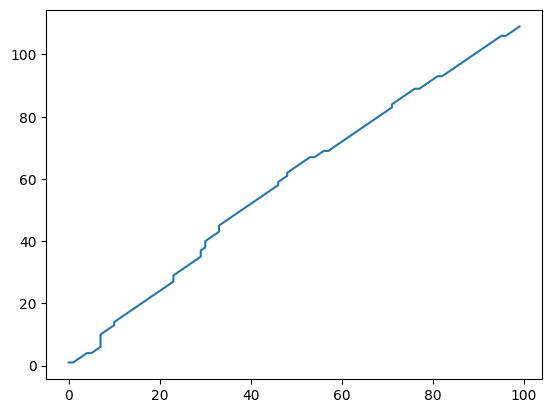

In [37]:
plt.plot(x_index,y_index)